In [ ]:
# prompt: import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path ='/content/drive/MyDrive/youth_tobacco_survey_yts_data.csv'

In [ ]:
df= pd.read_csv(file_path)

In [ ]:
df.head()

,year,locationabbr,locationdesc,topictype,topicdesc,measuredesc,datasource,response,data_value_unit,data_value_type,...,geolocation,topictypeid,topicid,measureid,stratificationid1,stratificationid2,stratificationid3,stratificationid4,submeasureid,displayorder
0,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,NaN,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,170CES,1GEN,8AGE,6RAC,1EDU,YTS01,1
1,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,NaN,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,170CES,2GEN,8AGE,6RAC,1EDU,YTS02,2
2,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,NaN,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,170CES,3GEN,8AGE,6RAC,1EDU,YTS03,3
3,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigare...,YTS,NaN,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,169QUA,1GEN,8AGE,6RAC,1EDU,YTS04,4
4,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigare...,YTS,NaN,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,169QUA,2GEN,8AGE,6RAC,1EDU,YTS05,5


In [ ]:
# prompt: check missing values

df.isnull().sum()


,0
year,0
locationabbr,0
locationdesc,0
topictype,0
topicdesc,0
measuredesc,0
datasource,0
response,2246
data_value_unit,0
data_value_type,0


In [ ]:
# prompt: remove column data_value_footnote_symbol
# data_value_footnote

# Assuming 'data_value_footnote_symbol' and 'data_value_footnote' are column names in your DataFrame 'df'
if 'data_value_footnote_symbol' in df.columns:
    df = df.drop('data_value_footnote_symbol', axis=1)

if 'data_value_footnote' in df.columns:
    df = df.drop('data_value_footnote', axis = 1)


In [ ]:
# prompt: check missing values

df.isnull().sum()

,0
year,0
locationabbr,0
locationdesc,0
topictype,0
topicdesc,0
measuredesc,0
datasource,0
response,2246
data_value_unit,0
data_value_type,0


In [ ]:
# prompt: unique values of response

# Assuming 'response' is a column in your DataFrame 'df'
unique_responses = df['response'].unique()
unique_responses


array([nan, 'Current', 'Ever', 'Frequent'], dtype=object)

In [ ]:
# prompt: replace nan with zero and current with 1 and ever with 2 frequent with 3 and convert the response column in integer by replacing with integer

# Replace NaN values in the 'response' column with 0
df['response'] = df['response'].fillna(0)

# Create a mapping dictionary for string replacements
response_mapping = {
    'Current': 1,
    'Ever': 2,
    'Frequent': 3
}


# Replace strings in the 'response' column using the mapping
df['response'] = df['response'].replace(response_mapping)

# Convert the 'response' column to integers
df['response'] = df['response'].astype(int)


<ipython-input-46-94a3a4f8cf18>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['response'] = df['response'].replace(response_mapping)


In [ ]:
df['response']
df.isnull().sum()

,0
year,0
locationabbr,0
locationdesc,0
topictype,0
topicdesc,0
measuredesc,0
datasource,0
response,0
data_value_unit,0
data_value_type,0


In [ ]:
# prompt: df geo location unique

# Assuming 'locationabbr' is the column containing geolocation information
unique_locations = df['geolocation'].unique()
unique_locations


array(['POINT(-111.76381127699972 34.865970280000454)',
       'POINT(-72.64984095199964 41.56266102000046)',
       'POINT(-83.62758034599966 32.83968109300048)',
       'POINT(-157.85774940299973 21.304850435000446)',
       'POINT(-88.99771017799969 40.48501028300046)',
       'POINT(-92.44568007099969 31.31266064400046)',
       'POINT(-89.53803082499968 32.745510099000455)',
       'POINT(-111.58713063499971 39.360700171000474)',
       'POINT(-92.56630005299968 38.635790776000476)', nan,
       'POINT(-99.36572062299967 41.6410409880005)',
       'POINT(-74.27369128799967 40.13057004800049)',
       'POINT(-79.15925046299964 35.466220975000454)',
       'POINT(-100.11842104899966 47.47531977900047)',
       'POINT(-77.86070029399963 40.79373015200048)',
       'POINT(-81.04537120699968 33.998821303000454)',
       'POINT(-80.71264013499967 38.66551020200046)',
       'POINT(-86.63186076199969 32.84057112200048)',
       'POINT(-75.57774116799965 39.008830667000495)',
       'POIN

In [ ]:
# prompt: Imputation: Fill missing values with estimated values in geolocation

# Check for missing values in the 'geolocation' column
missing_geolocation = df['geolocation'].isnull().sum()
print(f"Number of missing geolocation values: {missing_geolocation}")

if missing_geolocation > 0:
    # Imputation strategies:

    # 1. Forward fill: Propagate the last valid observation forward
    df['geolocation'] = df['geolocation'].fillna(method='ffill')

    # 2. Backward fill: Propagate the next valid observation backward
    # df['geolocation'] = df['geolocation'].fillna(method='bfill')

    # 3. Fill with a specific value (e.g., 'Unknown' or most frequent location)
    # most_frequent_location = df['geolocation'].mode()[0]
    # df['geolocation'] = df['geolocation'].fillna(most_frequent_location)


    # After imputation, verify that there are no more missing values in 'geolocation'
    remaining_missing_geolocation = df['geolocation'].isnull().sum()
    print(f"Number of missing geolocation values after imputation: {remaining_missing_geolocation}")

else:
    print("No missing geolocation values found.")


Number of missing geolocation values: 4
Number of missing geolocation values after imputation: 0


<ipython-input-49-e984ad362947>:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['geolocation'] = df['geolocation'].fillna(method='ffill')


In [ ]:
# prompt: df datatype

# Check data types of each column
df.dtypes


,0
year,int64
locationabbr,object
locationdesc,object
topictype,object
topicdesc,object
measuredesc,object
datasource,object
response,int64
data_value_unit,object
data_value_type,object


In [ ]:
# prompt: replace null values of "sample_size  ", high_confidence_limit" , low_confidence_limit",data_value data_value_std_err",    with 0.0 and

# Replace null values with 0.0 for specified columns
columns_to_fill = ["sample_size", "high_confidence_limit", "low_confidence_limit", "data_value", "data_value_std_err"]
df[columns_to_fill] = df[columns_to_fill].fillna(0.0)


In [ ]:
# Convert 'gender' to numerical if needed
X['gender'] = X['gender'].map({'Male': 0, 'Female': 1})
df.isnull().sum()

<ipython-input-56-6d586bda5ed8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['gender'] = X['gender'].map({'Male': 0, 'Female': 1})


,0
year,0
locationabbr,0
locationdesc,0
topictype,0
topicdesc,0
measuredesc,0
datasource,0
response,0
data_value_unit,0
data_value_type,0


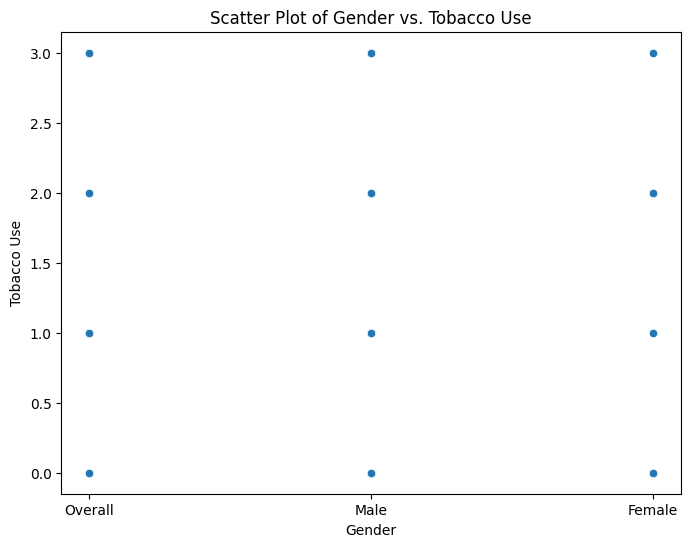

In [ ]:
# Assuming 'gender' and 'response' (representing tobacco use) are columns in your DataFrame 'df'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='gender', y='response', data=df)
plt.xlabel('Gender')
plt.ylabel('Tobacco Use')  # Corrected label
plt.title('Scatter Plot of Gender vs. Tobacco Use')
plt.show()


In [ ]:
# prompt: df gender unique

# Assuming 'gender' is a column in your DataFrame 'df'
unique_genders = df['gender'].unique()
unique_genders


array(['Overall', 'Male', 'Female'], dtype=object)

In [ ]:
# prompt: null values in gender and sample size

# ... (Your existing code)

# Handling null values in 'gender' and 'sample_size'
# Check for missing values in 'gender'
missing_gender = df['gender'].isnull().sum()
print(f"Number of missing gender values: {missing_gender}")

if missing_gender > 0:
    # Impute missing 'gender' values (example: using the most frequent gender)
    most_frequent_gender = df['gender'].mode()[0]
    df['gender'] = df['gender'].fillna(most_frequent_gender)

    # Alternatively, you could remove rows with missing 'gender' values:
    # df.dropna(subset=['gender'], inplace=True)

    print(f"Number of missing gender values after imputation: {df['gender'].isnull().sum()}")


# Check for missing values in 'sample_size'
missing_sample_size = df['sample_size'].isnull().sum()
print(f"Number of missing sample_size values: {missing_sample_size}")

if missing_sample_size > 0:
    # Impute missing 'sample_size' values (example: using the mean or median)
    # Using the mean:
    mean_sample_size = df['sample_size'].mean()
    df['sample_size'] = df['sample_size'].fillna(mean_sample_size)


    # Using the median:
    # median_sample_size = df['sample_size'].median()
    # df['sample_size'] = df['sample_size'].fillna(median_sample_size)
    print(f"Number of missing sample_size values after imputation: {df['sample_size'].isnull().sum()}")


# ... (Rest of your code)

# Convert 'gender' to numerical after handling missing values
X['gender'] = X['gender'].map({'Male': 0, 'Female': 1})


Number of missing gender values: 0
Number of missing sample_size values: 0


<ipython-input-57-8f11966d73db>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['gender'] = X['gender'].map({'Male': 0, 'Female': 1})


In [ ]:
# prompt: apply knns algorithm, SVMs polynomial regression and logestic regression

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer # Import SimpleImputer for imputation

# ... (your existing code)

# Feature selection (example)
X = df[['gender', 'sample_size', 'data_value']]  # Select relevant features
y = df['response']

# Convert 'gender' to numerical, handling potential missing values
X['gender'] = X['gender'].map({'Male': 0, 'Female': 1}).fillna(-1) # Fill NaN with -1 or another suitable value

# Impute missing values in X using SimpleImputer
imputer = SimpleImputer(strategy='mean') # or 'median', 'most_frequent'
X = imputer.fit_transform(X) # Fit and transform to impute missing values


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

# SVM with Polynomial Kernel
poly_svm = SVC(kernel='poly', degree=3)  # Adjust degree as needed
poly_svm.fit(X_train, y_train)
poly_svm_pred = poly_svm.predict(X_test)
print("SVM (Polynomial) Accuracy:", accuracy_score(y_test, poly_svm_pred))
print(classification_report(y_test, poly_svm_pred))


# Logistic Regression
logreg = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))


<ipython-input-62-1786c872db33>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['gender'] = X['gender'].map({'Male': 0, 'Female': 1}).fillna(-1) # Fill NaN with -1 or another suitable value


KNN Accuracy: 0.6186830015313936
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       471
           1       0.36      0.44      0.40       480
           2       0.61      0.58      0.60       495
           3       0.60      0.51      0.55       513

    accuracy                           0.62      1959
   macro avg       0.64      0.62      0.63      1959
weighted avg       0.64      0.62      0.62      1959

SVM (Polynomial) Accuracy: 0.34711587544665645
              precision    recall  f1-score   support

           0       0.36      0.99      0.53       471
           1       0.32      0.43      0.36       480
           2       0.69      0.02      0.04       495
           3       1.00      0.00      0.00       513

    accuracy                           0.35      1959
   macro avg       0.59      0.36      0.23      1959
weighted avg       0.60      0.35      0.23      1959

Logistic Regression Accuracy: 0.6773864216436958
 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
df.head()

,year,locationabbr,locationdesc,topictype,topicdesc,measuredesc,datasource,response,data_value_unit,data_value_type,...,geolocation,topictypeid,topicid,measureid,stratificationid1,stratificationid2,stratificationid3,stratificationid4,submeasureid,displayorder
0,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,0,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,170CES,1GEN,8AGE,6RAC,1EDU,YTS01,1
1,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,0,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,170CES,2GEN,8AGE,6RAC,1EDU,YTS02,2
2,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,0,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,170CES,3GEN,8AGE,6RAC,1EDU,YTS03,3
3,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigare...,YTS,0,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,169QUA,1GEN,8AGE,6RAC,1EDU,YTS04,4
4,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigare...,YTS,0,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,169QUA,2GEN,8AGE,6RAC,1EDU,YTS05,5


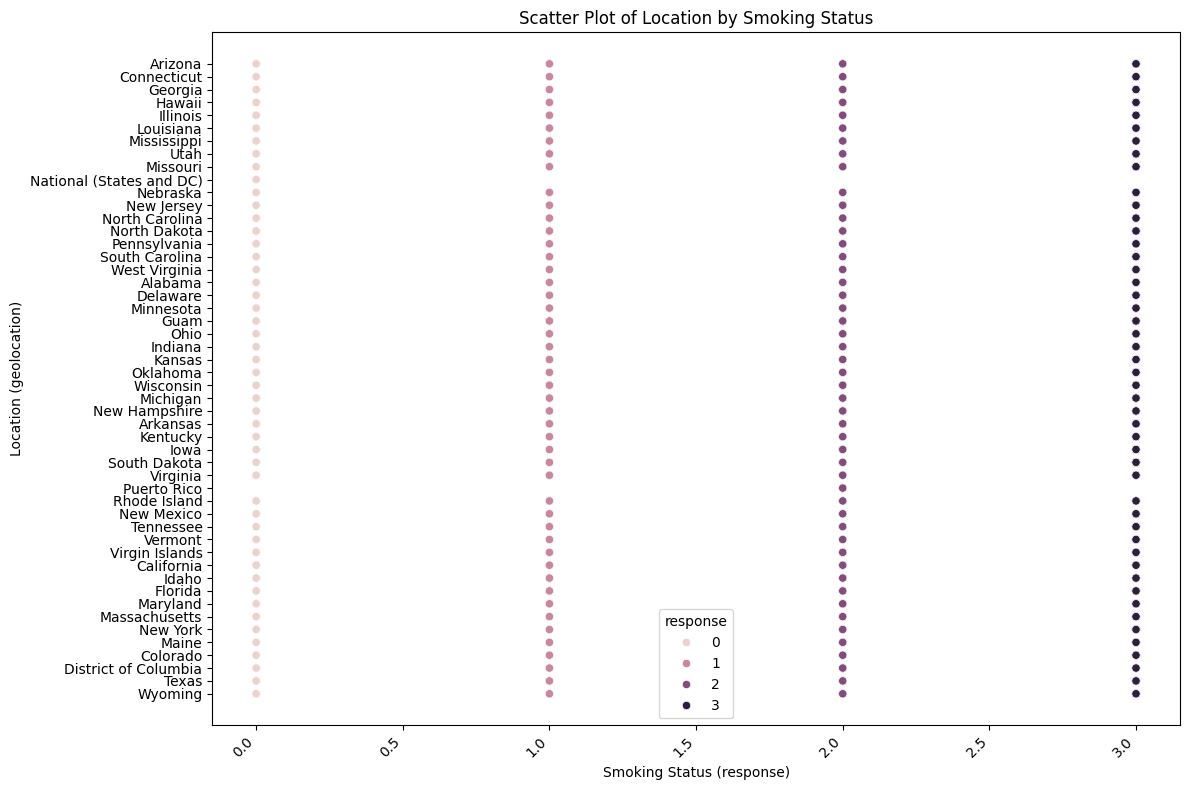

In [ ]:
# prompt: change the axis of this graph

# Assuming 'geolocation' represents location and 'response' represents smoking status
plt.figure(figsize=(12, 8))
sns.scatterplot(x='response', y='locationdesc', hue='response', data=df) # Swap x and y
plt.xlabel('Smoking Status (response)') # Swap labels
plt.ylabel('Location (geolocation)')
plt.title('Scatter Plot of Location by Smoking Status')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
# prompt: apply  all knn algorithm, SVM polynomial kernal,  logestic regression and random forest algorithm on this graph

# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust n_estimators
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.697294538029607
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       471
           1       0.49      0.49      0.49       480
           2       0.62      0.68      0.65       495
           3       0.72      0.67      0.69       513

    accuracy                           0.70      1959
   macro avg       0.70      0.70      0.70      1959
weighted avg       0.70      0.70      0.70      1959



In [ ]:
# prompt: apply  knn algorithm, SVM polynomial kernal,  logestic regression on geolocation and response

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming 'geolocation' and 'response' are your relevant columns
# and df is your DataFrame as defined in your provided code

# Prepare the data
le = LabelEncoder()
df['locationdesc'] = le.fit_transform(df['locationdesc'])  # Encode geolocation

X = df[['locationdesc', 'gender', 'sample_size']] # Use relevant features including geolocation
y = df['response']

# Handle missing values if any (replace with appropriate imputation)
X.fillna(x.mean(), inplace=True)  # Example: Impute missing values with mean


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

# Apply SVM with Polynomial Kernel
svm = SVC(kernel='poly', degree=3) # Degree can be adjusted
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("SVM (Polynomial) Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

# Apply Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))


NameError: name 'x' is not defined